In [42]:
#Librerías necesarias

import snscrape.modules.twitter as sntwitter
import pandas as pd
import os
from nltk.corpus import stopwords
from nltk.util import ngrams
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import emoji

In [43]:
#Directorio de trabajo
os.chdir('C:/Users/claud/Documents/')

In [44]:
#obtener tuits que contengan el hashtag #GrupoFirmeEnElZócalo


tweets_list = []
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#106RANDEZA').get_items()):
    if i>=10000:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username])



In [45]:
#crear dataframe
tweets_df = pd.DataFrame(tweets_list, columns=['datetime', 'tweet_id', 'text', 'Username'])

In [46]:
tweets_df

,datetime,tweet_id,text,Username
0,2022-10-12 17:22:58+00:00,1580247668588433408,Gracias por tanta grandeza @ClubAmerica! 🥇🦅\n\...,reporteroduran
1,2022-10-12 17:20:39+00:00,1580247087010451457,Mi corazón pintado bicolor... te quiere ver ca...,Cheto_882
2,2022-10-12 17:19:58+00:00,1580246914939121665,#106RANDEZA #106AñosDeGrandeza https://t.co/hs...,ElBichitops
3,2022-10-12 17:18:59+00:00,1580246665994256386,"Felices 106 años al mas grande de Mexico, grac...",HectorAlonsoGV
4,2022-10-12 17:17:00+00:00,1580246166775955456,Felices 106 años al más grande de México y mi ...,efectoRicalde
...,...,...,...,...
447,2022-10-12 05:16:05+00:00,1580064740826820608,Hoy se inicia el camino por la 14 #106RANDEZA ...,SosaBrayan1
448,2022-10-12 05:15:53+00:00,1580064692394786817,#106RANDEZA 🦅,AnteSuspendido
449,2022-10-12 05:15:21+00:00,1580064557107941376,#106RANDEZA https://t.co/8JUpQzrj90,TNMAXO_
450,2022-10-12 05:15:14+00:00,1580064528229756928,#106RANDEZA,ik_bron


In [47]:

#Extraer emojis usando emoji.emoji_lis en español
tweets_df['emojis'] = tweets_df['text'].apply(lambda x: emoji.distinct_emoji_list(x))
tweets_df

,datetime,tweet_id,text,Username,emojis
0,2022-10-12 17:22:58+00:00,1580247668588433408,Gracias por tanta grandeza @ClubAmerica! 🥇🦅\n\...,reporteroduran,"[🏆, 🥇, 🦅]"
1,2022-10-12 17:20:39+00:00,1580247087010451457,Mi corazón pintado bicolor... te quiere ver ca...,Cheto_882,[]
2,2022-10-12 17:19:58+00:00,1580246914939121665,#106RANDEZA #106AñosDeGrandeza https://t.co/hs...,ElBichitops,[]
3,2022-10-12 17:18:59+00:00,1580246665994256386,"Felices 106 años al mas grande de Mexico, grac...",HectorAlonsoGV,"[🦅, 💙, 💛]"
4,2022-10-12 17:17:00+00:00,1580246166775955456,Felices 106 años al más grande de México y mi ...,efectoRicalde,[🦅]
...,...,...,...,...,...
447,2022-10-12 05:16:05+00:00,1580064740826820608,Hoy se inicia el camino por la 14 #106RANDEZA ...,SosaBrayan1,"[🦅, 💙, 💛]"
448,2022-10-12 05:15:53+00:00,1580064692394786817,#106RANDEZA 🦅,AnteSuspendido,[🦅]
449,2022-10-12 05:15:21+00:00,1580064557107941376,#106RANDEZA https://t.co/8JUpQzrj90,TNMAXO_,[]
450,2022-10-12 05:15:14+00:00,1580064528229756928,#106RANDEZA,ik_bron,[]


In [48]:
#Imprimir fecha máxima y mínima
print(tweets_df['datetime'].max())
print(tweets_df['datetime'].min())

2022-10-12 17:22:58+00:00
2022-10-12 05:14:27+00:00


In [49]:
#Crear dataframe con frecuencia de emojis
emojis_df = pd.DataFrame(tweets_df['emojis'].explode().value_counts()).reset_index()
emojis_df

,index,emojis
0,🦅,196
1,💛,139
2,💙,123
3,🏆,28
4,❤️,25
...,...,...
88,💖,1
89,💪🏼,1
90,🌹,1
91,🔊,1


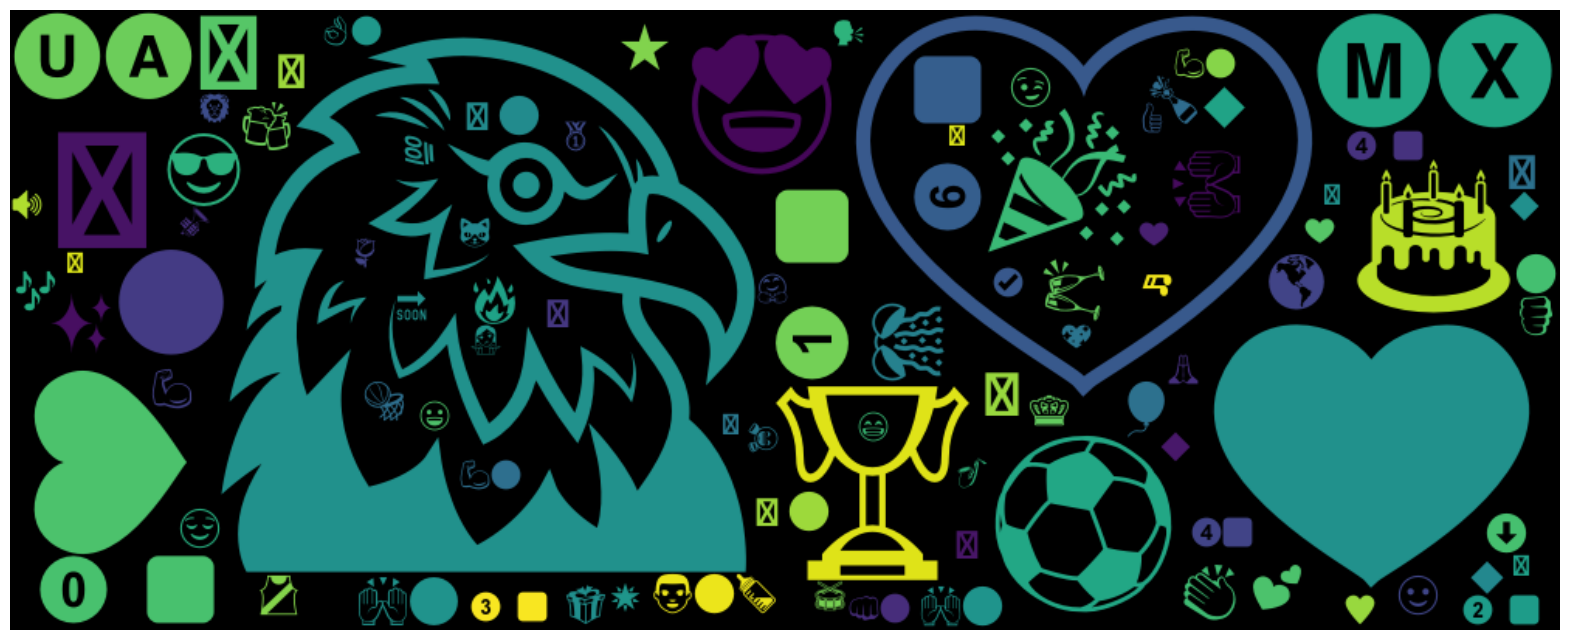

In [51]:
#Hacer wordcloud de emojis

#Fuente de emojis
#font_path = 'C:/Users/claud/AppData/Local/Microsoft/Windows/Fonts/TwitterColorEmoji-SVGinOT.ttf'
font_path = 'C:/Users/claud/AppData/Local/Microsoft/Windows/Fonts/EmojiOneColor.otf'


wc = WordCloud(background_color="black", width=1000, height=400, font_path=font_path, contour_width=3)
wc.generate_from_frequencies(dict(zip(emojis_df['index'], emojis_df['emojis'])))
plt.figure(figsize=(20,20))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('emojis_ame.png', bbox_inches='tight')
plt.show()

In [53]:
#Imprimir todas las filas del dataframe
pd.set_option('display.max_rows', None)
emojis_df

,index,emojis
0,🦅,196
1,💛,139
2,💙,123
3,🏆,28
4,❤️,25
5,⚽,23
6,🥳,20
7,🎂,17
8,🎉,16
9,😍,14
